### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [36]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot: xlabel='species', ylabel='count'>

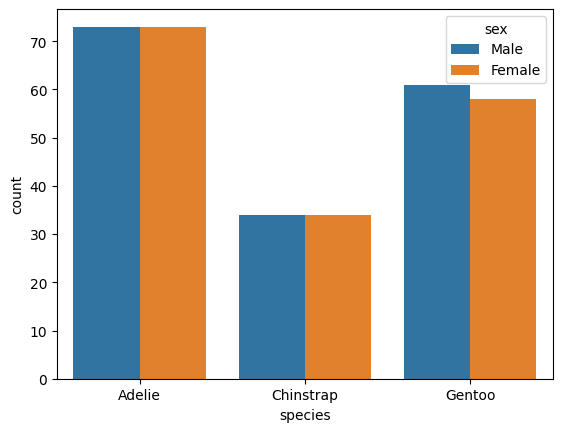

In [37]:
# species VS sex
sns.countplot(x='species', hue='sex', data=penguins)

Er zit geen correlatie tussen species en sex. Alle soorten zijn gelijkmatig verdeeld op basis van het type sex.

<AxesSubplot: xlabel='island', ylabel='count'>

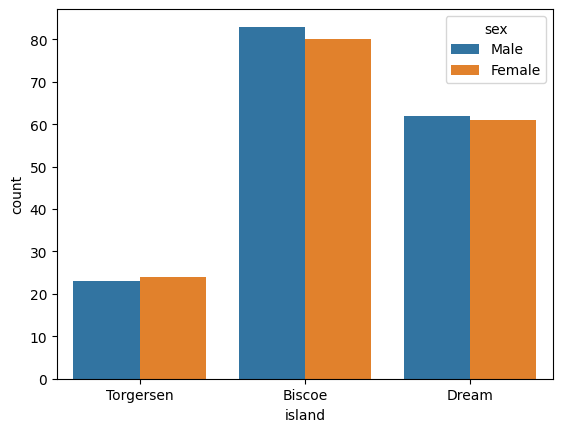

In [38]:
# island VS sex
sns.countplot(x='island', hue='sex', data=penguins)

Er zit geen correlatie tussen island en sex. Alle eilanden zijn gelijkmatig verdeeld op basis van het type sex.

In [39]:
from scipy.stats import chi2_contingency

def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

def check_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [40]:
penguinsContingencyTable = create_contingency_table(penguins, 'species','sex')

penguinsContingencyTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


<AxesSubplot: xlabel='sex'>

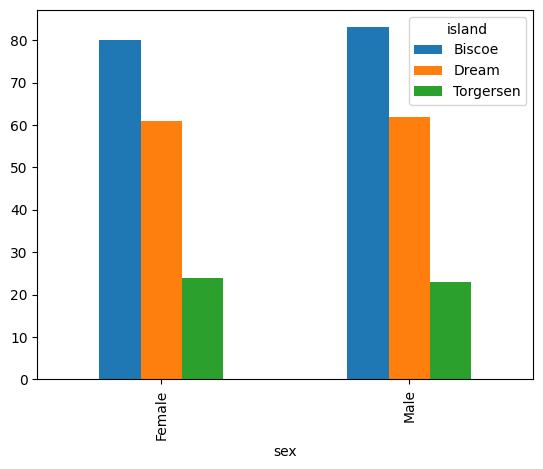

In [46]:
penguinsContingencyTable.plot(kind='bar')

Je ziet geen (grote) verschillen in de kolom sex op basis van de soort.

In [41]:
check_correlation(penguins, 'species', 'sex')

The odds of a correlation between species and sex is 2.4010631023415385% (Based on a p value of 0.9759893689765846).
This percentage needs to be at least 95% for a significant correlation.


De Chi2 test bevestigt dat er geen grote verschillen aanwezig zijn.

In [42]:
penguinsContingencyTable = create_contingency_table(penguins, 'island','sex')

penguinsContingencyTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


<AxesSubplot: xlabel='sex'>

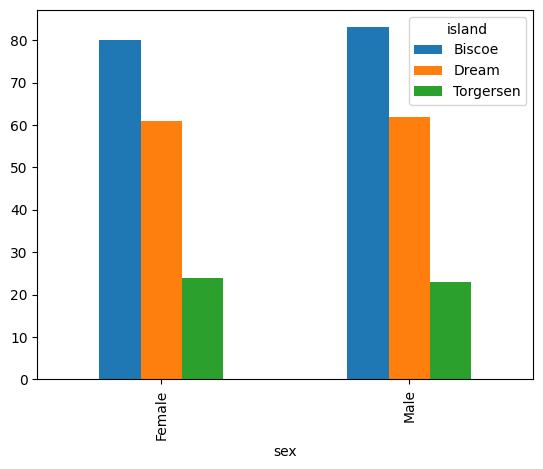

In [43]:
penguinsContingencyTable.plot(kind='bar')

Je ziet geen (grote) verschillen in de kolom sex op de verschillende eilanden.

In [44]:
check_correlation(penguins, 'island', 'sex')

The odds of a correlation between island and sex is 2.8388770718934975% (Based on a p value of 0.971611229281065).
This percentage needs to be at least 95% for a significant correlation.


De Chi2 test bevestigt dat er geen grote verschillen aanwezig zijn.